# **MÔI TRƯỜNG LẬP TRÌNH**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = ''

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

# **TIỀN XỬ LÝ DỮ LIỆU**

In [4]:
df = pd.read_excel(path + 'Market Basket Analysis 5.xlsx', header = None, sheet_name = 'Sheet1')
df.columns = ['Date', 'Basket']
df.head()

,Date,Basket
0,1/1/2000,"yogurt, pork, sandwich bags, lunch meat, all- ..."
1,1/1/2000,"toilet paper, shampoo, hand soap, waffles, veg..."
2,2/1/2000,"soda, pork, soap, ice cream, toilet paper, din..."
3,2/1/2000,"cereals, juice, lunch meat, soda, toilet paper..."
4,2/1/2000,"sandwich loaves, pasta, tortillas, mixes, hand..."


In [ ]:
df['Basket_length'] = df['Basket'].str.split(',').str.len()
print(df.head())

       Date                                             Basket  Basket_length
0  1/1/2000  yogurt, pork, sandwich bags, lunch meat, all- ...             21
1  1/1/2000  toilet paper, shampoo, hand soap, waffles, veg...             24
2  2/1/2000  soda, pork, soap, ice cream, toilet paper, din...             32
3  2/1/2000  cereals, juice, lunch meat, soda, toilet paper...              7
4  2/1/2000  sandwich loaves, pasta, tortillas, mixes, hand...             28


In [ ]:
df['Basket_length'] = df['Basket_length'].apply(lambda x: x-1)

In [ ]:
df['Basket_length'].describe()

,Basket_length
count,1499.000000
mean,19.388259
std,8.521395
min,5.000000
25%,12.000000
50%,20.000000
75%,27.000000
max,34.000000


In [ ]:
df.shape

(1499, 3)

In [7]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

,0
Date,0
Basket,0


# **EDA**

## Xem số lượng mặt hàng mua của các giao dịch

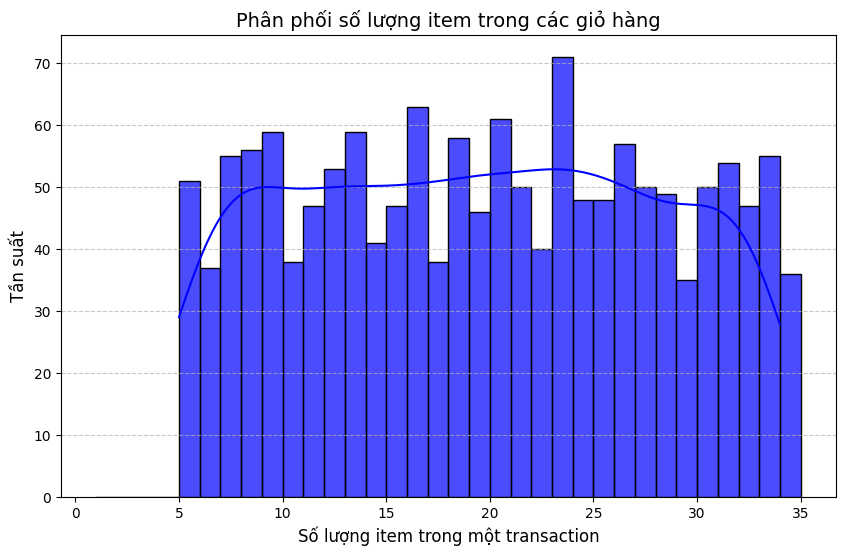

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Basket_length'], bins=range(1, df['Basket_length'].max() + 2), kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Phân phối số lượng item trong các giỏ hàng', fontsize=14)
plt.xlabel('Số lượng item trong một transaction', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
#plt.xticks(range(1, df['Basket_length'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1499 non-null   object
 1   Basket         1499 non-null   object
 2   Basket_length  1499 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 35.3+ KB


In [ ]:
items = [
    item.strip() for basket in df['Basket'] for item in basket.split(",") if item.strip()
]

freq = Counter(items)

print(len(freq))

freq


38


Counter({'yogurt': 718,
         'pork': 708,
         'sandwich bags': 692,
         'lunch meat': 754,
         'all- purpose': 707,
         'flour': 723,
         'soda': 782,
         'butter': 739,
         'vegetables': 2170,
         'beef': 714,
         'aluminum foil': 749,
         'dinner rolls': 721,
         'shampoo': 712,
         'mixes': 731,
         'soap': 734,
         'laundry detergent': 711,
         'ice cream': 746,
         'toilet paper': 741,
         'hand soap': 664,
         'waffles': 758,
         'cheeses': 751,
         'milk': 727,
         'dishwashing liquid/detergent': 729,
         'individual meals': 717,
         'cereals': 744,
         'tortillas': 707,
         'spaghetti sauce': 710,
         'ketchup': 688,
         'sandwich loaves': 707,
         'poultry': 806,
         'bagels': 749,
         'eggs': 738,
         'juice': 728,
         'pasta': 714,
         'paper towels': 727,
         'coffee/tea': 739,
         'fruits': 698,
 

## Top 5 mặt hàng mua nhiều nhất

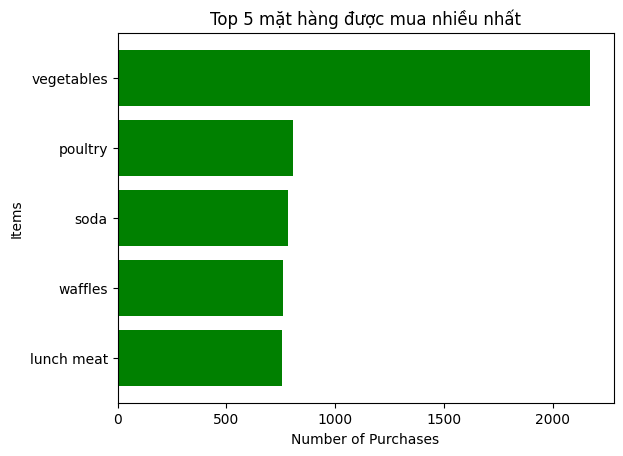

In [ ]:
most_bought = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:5]
items, counts = zip(*most_bought)

plt.barh(items, counts, color='green')
plt.xlabel('Number of Purchases')
plt.ylabel('Items')
plt.title('Top 5 mặt hàng được mua nhiều nhất')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

## Top 5 mặt hàng được mua ít nhất

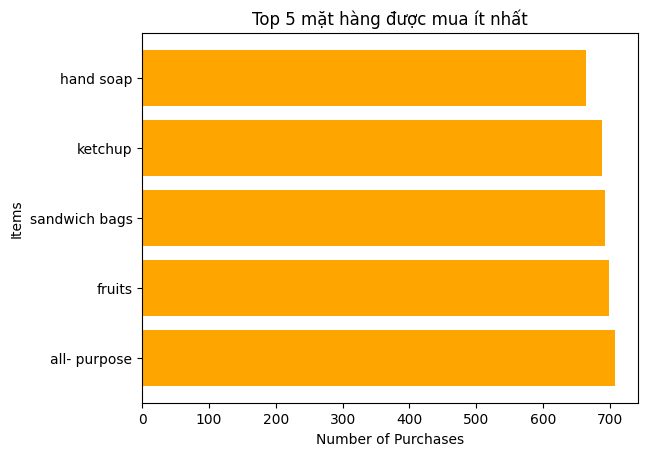

In [ ]:
least_bought = sorted(freq.items(), key=lambda x: x[1])[:5]
items, counts = zip(*least_bought)
plt.barh(items, counts, color='orange')
plt.xlabel('Number of Purchases')
plt.ylabel('Items')
plt.title('Top 5 mặt hàng được mua ít nhất')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1499 non-null   datetime64[ns]
 1   Basket         1499 non-null   object        
 2   Basket_length  1499 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 35.3+ KB


## Phân tích thời gian

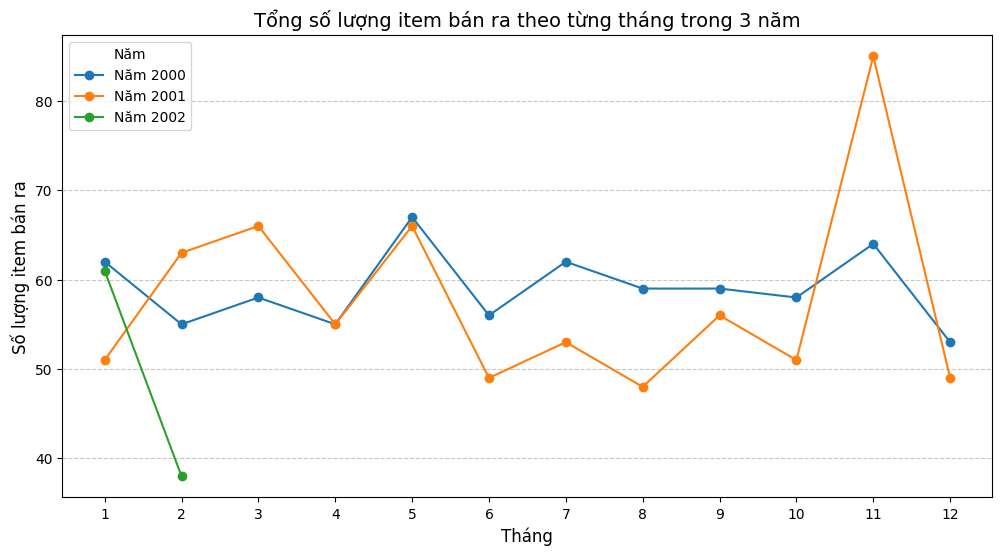

In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Total Items Sold')
pivot_sales = monthly_sales.pivot(index='Month', columns='Year', values='Total Items Sold')

plt.figure(figsize=(12, 6))
for year in pivot_sales.columns:
    plt.plot(pivot_sales.index, pivot_sales[year], marker='o', linestyle='-', label=f'Năm {year}')

plt.title('Tổng số lượng item bán ra theo từng tháng trong 3 năm', fontsize=14)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng item bán ra', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Năm')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
df.to_csv(path + 'processed_data.csv', index=False)